# Graph Generators

NetworkX comes with a large number of builtin graph generators. These can be especially useful for testing out new measures, metrics, and dynamics, on already well tested algorithms. In this notebook, we'll go through some of the different classes of graph generators included in NetworkX and write a few of our own. There are a lot of generators in NetworkX so before you implement your own check to see NetworkX already has it!

In [22]:
import networkx as nx

## Classic

NetworkX has the ability to make a bunch of the graphs we made in the previous section. They mainly fall under the `classic` namespace. For example, to make a complete graph, we could just use:

In [23]:
C = nx.generators.classic.complete_graph(5)

C.nodes(), C.edges()

(NodeView((0, 1, 2, 3, 4)),
 EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]))

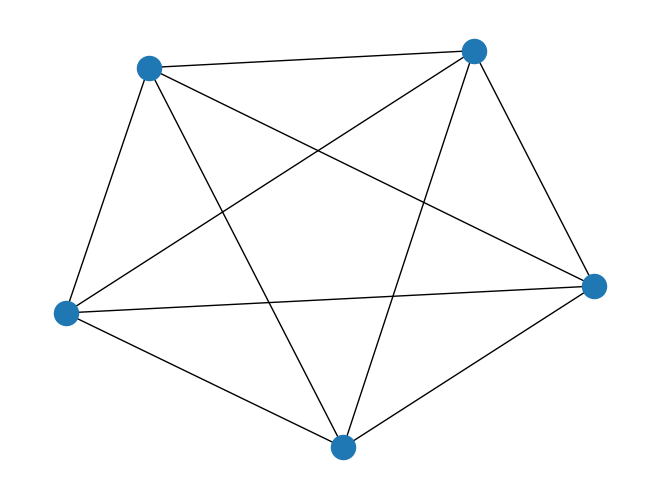

In [24]:
nx.draw(C)

We don't actually have to use the full namespace call that is `nx.generators.classic.complete_graph`, everythin is under the `nx` module

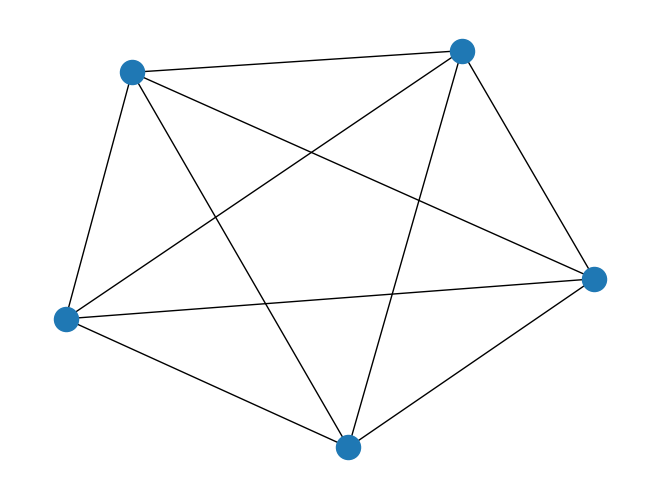

In [25]:
nx.draw(nx.complete_graph(5))

### Exercises

Explore the classic generators, create graphs for at least 3 of them. You can list the graphs by typing `nx.generators.classic.[TAB]`. Read the documentation for each (remember you can type (`nx.circulant_graph?`) to see the documentation

## Small Data Sets

NetworkX contains a number of small graphs from classic work. For example the Zachary karate Club is often used for testing community finding algorithms. It is included in networkx along with the community information

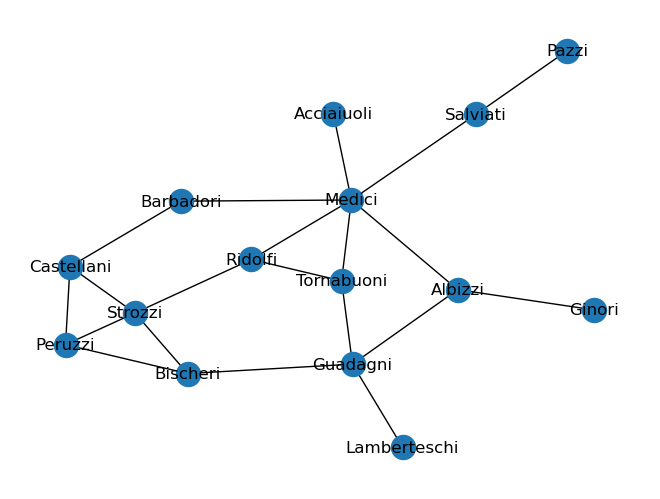

In [26]:
FF = nx.generators.social.florentine_families_graph()

nx.draw(FF, with_labels=True)

In [27]:
KC = nx.karate_club_graph()

KC.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

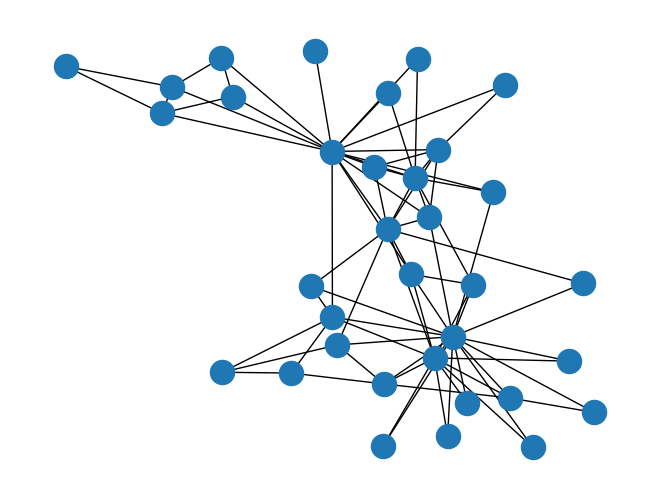

In [28]:
nx.draw(KC)

Others are included under `nx.generators.social`. Explore the `davis_southern_women_graph`, what is special about it?

In [29]:
DSW = nx.davis_southern_women_graph()

DSW.nodes(), DSW.edges()

(NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14')),
 EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), (

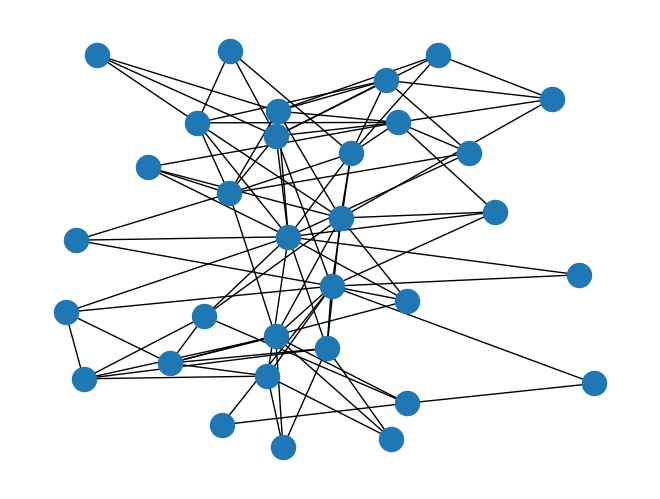

In [30]:
nx.draw(DSW)

## Random Graphs

Random graphs are often used as models for various physical phenomena, and testing new measures and dynamics. NetworkX has a bunch of them built in. For example the classic Erdős–Rényi graph is implemented as `gnp_random_graph` which takes a number of nodes and a probability of connection between any two nodes

In [10]:
ER = nx.gnp_random_graph(100,1.0/100)

In [11]:
ER.order(), ER.size()

(100, 48)

A slight variant allows you to give it the total number of edges to be placed randomly

In [12]:
ER2 = nx.gnm_random_graph(100,50)

In [13]:
ER2.order(), ER2.size()

(100, 50)

### Small World Graphs

The Erdős–Rényi does not have many of the properties seen in real world social network data, particularly, triadic closures. Watts and Strogatz developed a random graph model which accounts for this, and it's implemented in NetworkX!

In [14]:
WS = nx.watts_strogatz_graph(100,4,.02)

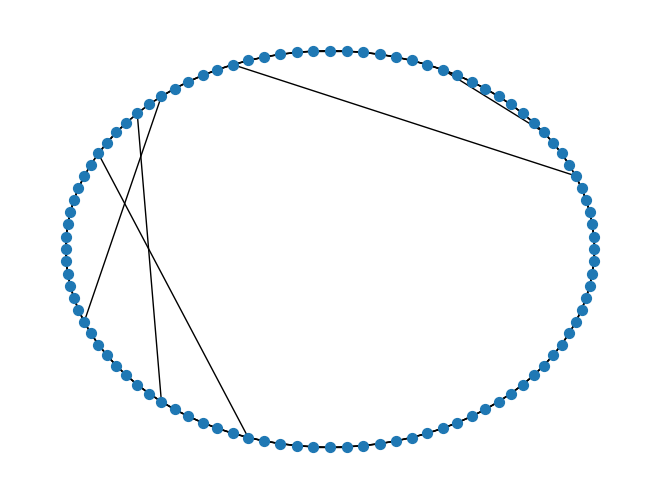

In [15]:
nx.draw_circular(WS, node_size=50)

### Power Law Random Graphs

A common feature of complex networks is their heavy-tailed degree distribution. That is the degrees of the nodes in a graph varies over many orders of magnitude. NetworkX contains a number of random graph models that have power law degree sequences. One of the most famous is the Barabási–Albert model. In this model nodes are added sequentially and a fixed number of edges between new nodes and existing nodes are added with nodes being selected with probability proportional to their degree. 

In [16]:
BA = nx.barabasi_albert_graph(1000,1)

In [17]:
deg = dict(BA.degree())

min_node = min(deg, key=deg.get)
max_node = max(deg, key=deg.get)

print(f"Min degree: {min_node, deg[min_node]}")
print(f"Max degree: {max_node, deg[max_node]}")

Min degree: (8, 1)
Max degree: (4, 45)


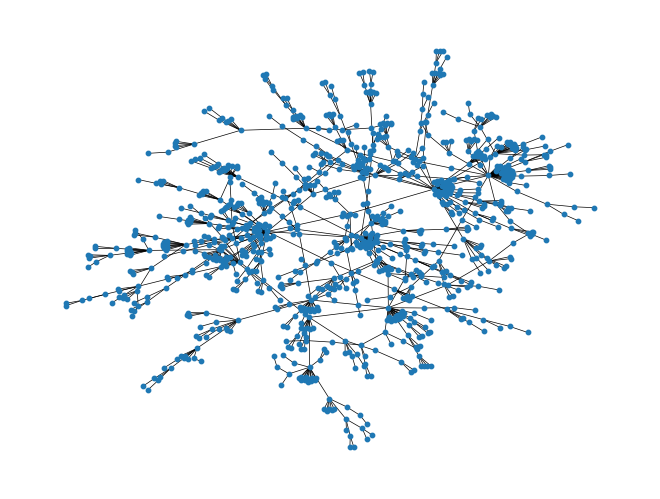

In [18]:
nx.draw(BA, node_size=10, width=0.5)

We'll plot degree sequences in the next lesson on graph analysis.

## Excercise

One more exercise and then we'll get to the fun stuff. On disadvantage of the original Barabási–Albert model is that it had an integer average degree and the degree distribution was power law, but could only have integer exponent. Let's make a model that is able to have non-integer exponent.

Let's write a new model. Instead of adding a fixed number of edges with each node, we add a random number of edges from a Poisson distribution with mean $\lambda$. To ensure the graph stays connected, if the random number of edges is 0 we add at least 1 edge. Just as in the original model, we connect to new nodes to the graph to nodes proportional to the degree of the node.

First lets find a function that can generate poisson random numbers for us. It's easy to do with the `numpy` package, we can import numpy and then just call `np.random.poisson` to generate a random number with $Poisson(\lambda)$

In [19]:
import numpy as np

X = np.random.poisson(3.2, size=10000)
X.mean()

3.2245

[0, 1, 2]
0
1
2


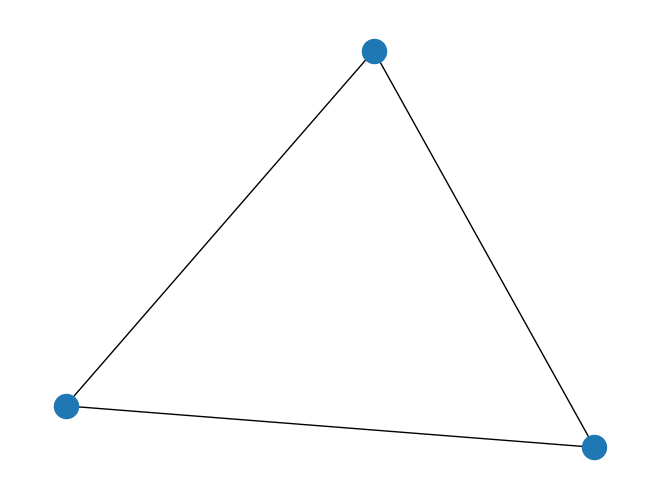

In [34]:
G = nx.complete_graph(3)
print(G.nodes)
nx.draw(G)

for node in G.nodes():
    print(node)

A trick to write a fast BA implementation is to maintain a list of nodes with nodes repeated in the list each time they have a connection made. 

In [92]:
def poisson_BA(n,l):

    start = max(2, np.random.poisson(l)) # start with at least two nodes
    
    G = nx.complete_graph(start)
    
    # an easy list to grab nodes from
    repeated_nodes = []
    # for each node add it's label to the list for as many times as it's degree
    for node in G.nodes:
        for _ in range(start - 1):
            repeated_nodes.append(node)
    
    u = start
    
    while u < n:
        # using the the poisson random number generator, generate a number of connections
        # make sure it's greater than 1
        # store that variable in `connections`
        connections = np.random.poisson()
        if connections < 1:
            connections = 1
            
        for _ in range(connections):
            # for as many connections as it has select a node at random from repeated_nodes
            # hint: numpy as a np.random.choice function
            # be sure to update repeated_nodes!
            choice = np.random.choice(repeated_nodes)
            G.add_edge(u, choice)
            
            repeated_nodes.append(u)
            repeated_nodes.append(choice)
        u += 1
        
    return G        

In [93]:
G = poisson_BA(10, np.pi)

In [94]:
np.mean([d for n,d in G.degree()])

2.6

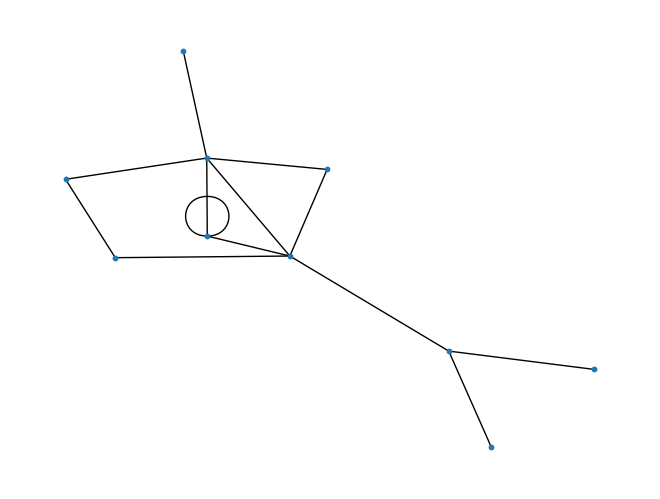

In [95]:
nx.draw(G, node_size=10)